# performing data cleaning and preprocessing using python libraries pandas numpy

## 📚 Learning Objectives

By completing this notebook, you will:
- Load/construct a dataset with Pandas
- Perform basic cleaning (missing values, types)
- Run simple EDA and feature engineering

## 🔗 Prerequisites

- ✅ Python basics
- ✅ Jupyter Notebook basics

---

## Official Structure Reference

This notebook covers practical activities from **Course 12, Unit 2**:
- performing data cleaning and preprocessing using python libraries pandas numpy
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md`

---

## Overview

We will construct a dataset locally, introduce missing values, then:
- clean it
- explore relationships
- prepare features for ML


In [1]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(7)

n = 500
age = rng.integers(18, 70, size=n)
income = rng.normal(4000, 1200, size=n).clip(800, None)
city = rng.choice(['Riyadh', 'Jeddah', 'Dammam'], size=n, p=[0.5, 0.3, 0.2])
clicked = (income > 4200).astype(int)

# inject missing values
income[rng.choice(n, size=30, replace=False)] = np.nan

df = pd.DataFrame({'age': age, 'income': income, 'city': city, 'clicked': clicked})
df.head()


,age,income,city,clicked
0,67,1359.501193,Riyadh,0
1,50,3169.512939,Riyadh,0
2,53,1637.444072,Riyadh,0
3,64,800.000000,Jeddah,0
4,48,3363.861580,Riyadh,0


In [2]:
# Cleaning
print(df.isna().sum())

df['income'] = df['income'].fillna(df['income'].median())
df['city'] = df['city'].astype('category')

# Simple feature engineering

df['income_per_age'] = df['income'] / df['age']

print(df.dtypes)
df.describe(include='all')


age         0
income     30
city        0
clicked     0
dtype: int64
age                  int64
income             float64
city              category
clicked              int64
income_per_age     float64
dtype: object


,age,income,city,clicked,income_per_age
count,500.00000,500.000000,500,500.000000,500.000000
unique,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Riyadh,NaN,NaN
freq,NaN,NaN,253,NaN,NaN
mean,44.34800,3914.062701,NaN,0.386000,101.637155
std,15.12125,1120.724112,NaN,0.487318,51.727130
min,18.00000,800.000000,NaN,0.000000,12.500000
25%,31.00000,3221.343472,NaN,0.000000,65.459203
50%,45.00000,3924.204274,NaN,0.000000,86.521303
75%,57.25000,4599.900390,NaN,1.000000,131.082710


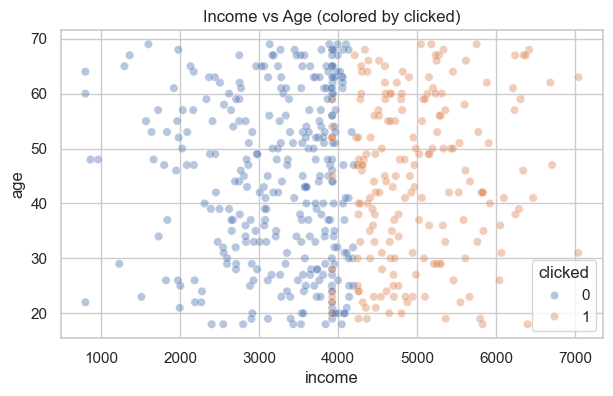

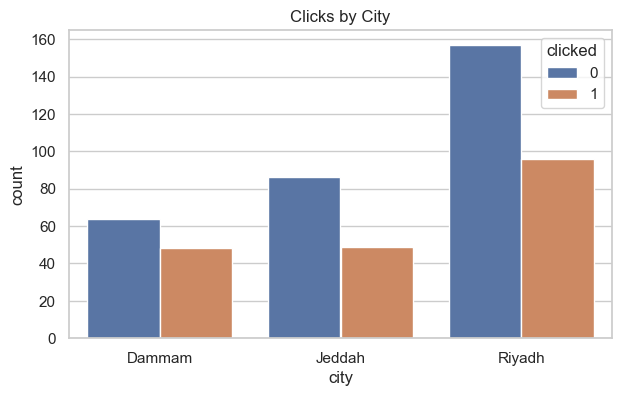

In [3]:
# EDA (lightweight)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='income', y='age', hue='clicked', alpha=0.4)
plt.title('Income vs Age (colored by clicked)')
plt.show()

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='city', hue='clicked')
plt.title('Clicks by City')
plt.show()
